## 1. Importing functions:

In [1]:
import jax
from jax import config
import jax.numpy as jnp

### Restricting the usage to the CPU
jax.config.update('jax_default_device', jax.devices('cpu')[0])

# # JAX supports single-precisions numbers by default.For double precision, use:
# # https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html
config.update("jax_enable_x64", True)

## 2. Running simulations:

In [2]:
from functions_perturbation_theory_real import (qfi_coherent, qfi_single)

### Parameters:
avg_num_phot =10.0

### Width of the pulse
twidth_vals = jnp.linspace(0.0016,20.0,100)

###################################################################
### QFI of a coherent state up to second order perturbation theory:
qfi_coherent_vec =jax.vmap(qfi_coherent, in_axes=(0,None))
qfi_coherent_state_vals = qfi_coherent_vec(twidth_vals, avg_num_phot)

###################################################################
### QFI of a single photon pulse:
qfi_single_vec =jax.vmap(qfi_single, in_axes=(0))
qfi_single_photon_vals = qfi_single_vec(twidth_vals)

print(qfi_coherent_state_vals[-1])
print(qfi_single_photon_vals[-1])

[0.07768603]
[0.07768603]


### 2a. Checking if the QFI of single-photon pulse overlaps with the perturbation theory of coherent state:

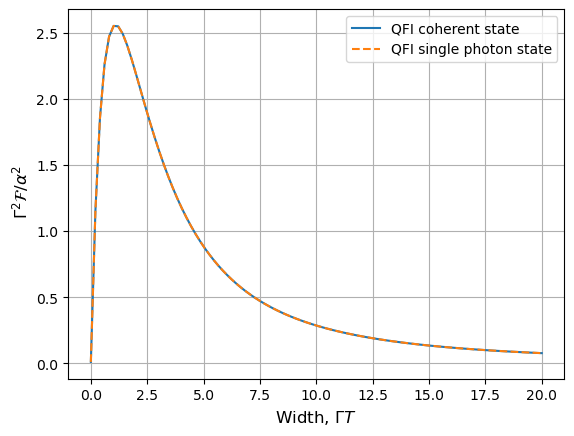

In [3]:
import matplotlib.pyplot as plt
#############################################################################
plt.plot(twidth_vals, qfi_coherent_state_vals, label='QFI coherent state')
plt.plot(twidth_vals, qfi_single_photon_vals,'--', label='QFI single photon state')
plt.legend(loc='upper right')
plt.ylabel(r" $\Gamma^{2} \mathcal{F}/\alpha^{2}$", size=12)
plt.xlabel(r"Width, $\Gamma T$", size=12)
plt.grid()